## Collecting Interesting Results of BiModal

### Good Example of NL -> Code

In [1]:
from codemend.models.test_bimodal2 import load_model, eval_one

Restored from /Users/ronxin/Dropbox/git/codemend/codemend/experimental/code_suggest/output/backup/elem_pyplot_counts_0404.pickle
CodeSuggest: Loading pyplot fu...
CodeSuggest: read 131 fu pairs
Restored from /Users/ronxin/Dropbox/git/codemend/codemend/experimental/code_suggest/output/backup/elem_pyplot_counts_0404.pickle
Restored from /Users/ronxin/Dropbox/git/codemend/codemend/experimental/code_suggest/output/backup/elem_pyplot_counts_0404.pickle


In [2]:
w2v_model, model = load_model('-d')

Using customized model_id
@@@ PLEASE CHECK WHICH FILE IS BEING TESTED ... @@@
@@@ MODEL_FILE: models/output/bi2-0410-d.model @@@


This part is mostly focused on the NL model itself. Can use several word2vec cases to illustrate this. Directly looking up stuff.

Can directly use word2vec to mention that `alpha` and `transparency`, etc. has great neighborhoods.

thicknes has linewidth in neighbor; alpha has opacity, lightness, and saturation, transparency in neighbor; rotation has angle, orientation, counter-clockwise in neighbor;  <— can mention this in the paper)

__An example of synonym handling.__

In [3]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', 'create a heatmap', [])
suggest_sorted[:10]

# the doc says: create a pseudocolor plot of a 2-d array

[SuggestItem(elem='plt.pcolor', score=-0.78801955311526228),
 SuggestItem(elem='plt.subplot2grid@colspan', score=-0.93819437120457394),
 SuggestItem(elem='plt.tripcolor', score=-0.9552513038132151),
 SuggestItem(elem='plt.pcolor@0', score=-1.2975969477398355),
 SuggestItem(elem='plt.subplot2grid@rowspan', score=-1.3239172264709138),
 SuggestItem(elem='plt.subplots', score=-1.6594702872062252),
 SuggestItem(elem='plt.tripcolor@1', score=-2.1283936251059909),
 SuggestItem(elem='plt.pcolor@1', score=-2.1318526746985835),
 SuggestItem(elem='plt.tripcolor@0', score=-2.3153404226449865),
 SuggestItem(elem='plt.hist@0', score=-2.4542561397959584)]

__An example of looking up parameters.__

In [4]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', 'add shadow to legend box', [])
suggest_sorted[:10]

[SuggestItem(elem='plt.legend@shadow', score=4.2475464094978257),
 SuggestItem(elem='plt.text@bbox@boxstyle', score=2.2598484531057892),
 SuggestItem(elem='plt.boxplot', score=0.44598851355077951),
 SuggestItem(elem='plt.boxplot@vert', score=0.38773439775204466),
 SuggestItem(elem='plt.text@bbox', score=0.37785737461653923),
 SuggestItem(elem='plt.pie@shadow', score=0.021525115355863988),
 SuggestItem(elem='plt.gca.bxp', score=-0.1762438778108848),
 SuggestItem(elem='plt.legend', score=-0.25761080993347818),
 SuggestItem(elem='plt.boxplot@patch_artist', score=-0.26149642142026153),
 SuggestItem(elem='plt.annotate@bbox@boxstyle', score=-0.32634974653815263)]

### Code -> Code

__An example of code prediction: recommending function.__

In [35]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', '', ['plt.bar','plt.title','plt.bar@label'])

suggest_sorted = filter(lambda x:(x.elem.startswith('plt.bar@') and not 'error_kw' in x.elem) or x.elem.startswith('plt.legend'), suggest_sorted)
print 'Suggested n-gram,Score (Unormalized)'
for x,y in suggest_sorted[:10]:
    print '%s,%.3f'%(x,y)

# Can ignore the obvious ones, and focus on plt.legend.

Suggested n-gram,Score (Unormalized)
plt.bar@1,-3.510
plt.legend,-3.715
plt.bar@0,-4.478
plt.bar@hatch,-4.556
plt.bar@log,-5.512
plt.bar@capsize,-5.573
plt.legend@loc,-5.715
plt.legend@0,-6.027
plt.legend@1,-6.096
plt.bar@2,-6.360


In [6]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', '', ['plt.contourf', 'plt.xlabel'])
suggest_sorted[:10]

# Can look at plt.clabe and plt.ylabel

[SuggestItem(elem='plt.plot@2', score=-2.7624459),
 SuggestItem(elem='plt.xlabel', score=-3.6175334),
 SuggestItem(elem='plt.figure', score=-3.6680682),
 SuggestItem(elem='plt.show', score=-3.7916179),
 SuggestItem(elem='plt.gca', score=-3.9611392),
 SuggestItem(elem='plt.figure.add_subplot@0', score=-4.2267737),
 SuggestItem(elem='plt.ylabel', score=-4.3605466),
 SuggestItem(elem='plt.figure.add_subplot@sharex', score=-4.4766192),
 SuggestItem(elem='plt.clabel@inline_spacing', score=-4.9024892),
 SuggestItem(elem='plt.figure.add_subplot@1', score=-4.9343376)]

In [7]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', '', ['plt.plot','plt.plot@color'])

suggest_sorted = filter(lambda x:x.elem.startswith('plt.plot@'), suggest_sorted)
suggest_sorted[:15]

# Can focus on @label, @linewidth, @marker

[SuggestItem(elem='plt.plot@1', score=-4.6351042),
 SuggestItem(elem='plt.plot@label', score=-5.1319871),
 SuggestItem(elem='plt.plot@lw', score=-5.3192649),
 SuggestItem(elem='plt.plot@0', score=-5.7902393),
 SuggestItem(elem='plt.plot@color', score=-5.9276853),
 SuggestItem(elem='plt.plot@solid_capstyle', score=-5.9779816),
 SuggestItem(elem='plt.plot@visible', score=-6.1596565),
 SuggestItem(elem='plt.plot@linewidth', score=-6.3119426),
 SuggestItem(elem='plt.plot@ls', score=-6.441226),
 SuggestItem(elem='plt.plot@c', score=-6.5080647),
 SuggestItem(elem='plt.plot@marker', score=-6.6695943),
 SuggestItem(elem='plt.plot@alpha', score=-6.878922),
 SuggestItem(elem='plt.plot@linestyle', score=-6.9828649),
 SuggestItem(elem='plt.plot@solid_joinstyle', score=-7.0469084),
 SuggestItem(elem='plt.plot@fillstyle', score=-7.1943598)]

### Code -> NL

In [8]:
from codemend import relative_path

In [9]:
with open(relative_path('models/output/mpl_so_goals.txt')) as reader:
    id_goals = reader.read().decode('utf-8').split('\n')

In [10]:
len(id_goals)

3703

In [11]:
goals = []
for x in id_goals:
    if len(x.split('\t')) == 2:
        id_,goal = x.split('\t')
        goals.append(goal)

In [12]:
len(goals)

3702

In [13]:
import numpy as np
from codemend.models.bimodal2 import get_l_idxs
# Index all goal vectors
vecs = []
indexed_goals = []
for goal in goals:
    goal_original = goal
    goal = goal.replace('matplotlib', ' ')
    goal = goal.replace('python', ' ')
    goal = goal.replace('error', ' ')
    if not goal: continue
    l_idxs = get_l_idxs(model, goal)
    if not l_idxs: continue
    l_vec = model.syn0l[l_idxs].mean(0)
    vecs.append(l_vec)
    indexed_goals.append(goal_original)
vecmat = np.array(vecs)

In [14]:
vecmat.shape

(3688, 150)

In [15]:
lower_rvecs = model.syn1r[:,model.vector_size:]

In [16]:
lower_rvecs.shape

(9569, 150)

In [17]:
all_sim = vecmat.dot(lower_rvecs.T)

In [18]:
np.max(all_sim), np.min(all_sim)

(39.69572279036101, -54.035363683362064)

In [19]:
x,y = np.nonzero(np.bitwise_and(all_sim >= 15, all_sim <= 20))
# x is goal_idx; y is elem_idx
for xi,yi in zip(x,y):
    print '%.2f -- %s -- %s'%(
        all_sim[xi,yi],indexed_goals[xi],model.all_elems[yi])

18.00 -- on lion installation -- plt.xlabel
16.34 -- color and line writing  -- plt.plot@color
15.24 -- questions -- plt.gca.set_aspect
19.43 -- change a patch in patchcollection -- plt.gca.add_patch
19.69 -- change a patch in patchcollection -- plt.gca.add_patch@0
16.32 -- subprocess/backend issue -- plt.plot@0
16.46 -- subprocess/backend issue -- plt.plot@1
15.44 -- subprocess/backend issue -- plt.xlim
18.38 -- with dates -- plt.plot_date.__doc__
19.86 -- with dates -- plt.plot_date@2
15.10 -- with dates -- plt.plot_date@fmt
18.55 -- with dates -- plt.plot_date@tz
16.47 -- with dates -- plt.plot_date@xdate
16.39 -- with dates -- plt.plot_date@ydate
15.87 -- turn a numpy array into a matplotlib colormap -- plt.pcolor@cmap
15.59 -- turn a numpy array into a matplotlib colormap -- plt.pcolormesh@cmap
15.12 -- update lines  -- plt.plot@color
19.29 -- save matplotlib file to a directory -- plt.xticks
15.19 -- save matplotlib file to a directory -- plt.xticks@0
15.48 -- change the font siz

__Good cases:__
- 17.11 -- get matplotlib legend location -- plt.legend@loc
- 15.56 -- draw boxes -- plt.text@bbox
- 18.06 -- make a log log histogram  -- plt.hist@log
- 17.23 -- make a log log histogram  -- plt.loglog

In [20]:
yi = model.elem_lookup['plt.legend@loc']
items = zip(indexed_goals, all_sim[:,yi].tolist())
items_ = []
for item,score in items:
    if 'legend' in item:
        score *= 3
    items_.append((item,score))
items = items_
items = sorted(items, 
       key=lambda x:x[1], reverse=True)
for item,score in items[:10]:
    print '%.2f, %s'%(score, item)

51.33, get matplotlib legend location
29.89, legend location default
29.51, legend location numbers
22.80, legends not working
22.80, stackplot legend error
22.80, change legend fontname 
22.80, whole legend leftaligned
18.45, legend help
16.52, add legend to ims() 
14.61, save matplotlib file to a directory


In [21]:
yi = model.elem_lookup['plt.loglog']
items = zip(indexed_goals, all_sim[:,yi].tolist())
items_ = []
for item,score in items:
    if 'log' in item:
        score *= 3
    items_.append((item,score))
items = items_
items = sorted(items, 
       key=lambda x:x[1], reverse=True)
for item,score in items[:10]:
    print '%.2f, %s'%(score, item)

51.69, make a log log histogram 
42.61, fit to a log scale
35.21, create square log-log plots 
32.70, use log scale on polar axis 
31.77, annotate doesn't work on log scale
31.07, plot lines in log-scale (python)
29.70, log axis: display powers of 10 only
28.09, log scales causes missing points
26.19, make four-way logarithmic plot 
25.59, add a colorbar with log data in an image/matrix


In [62]:
yi = model.elem_lookup['plt.hist@log']
items = zip(indexed_goals, all_sim[:,yi].tolist())
items_ = []
for item,score in items:
    if 'log' in item:
        score *= 3
    items_.append((item,score))
items = items_
items = sorted(items, 
       key=lambda x:x[1], reverse=True)
for item,score in items[:10]:
    print '%s, %.2f'%(item, score)

make a log log histogram , 54.19
fit to a log scale, 38.64
annotate doesn't work on log scale, 33.93
create square log-log plots , 30.79
use log scale on polar axis , 29.55
plot lines in log-scale (python), 28.50
histogram with log laplacian pdf, 28.09
make a particular axis which isn't linear or log, 26.40
log scale with limit turns off the bottom/up plot spine, 26.15
log axis: display powers of 10 only, 26.15


### NL + Code -> Code

In [37]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', 'add text label', [])
for x,y in suggest_sorted[:10]:
    print '\\code{%s} & %.3f  \\\\'%(x,y)

\code{plt.plot@label} & 6.143  \\
\code{plt.text} & 5.881  \\
\code{plt.clabel} & 5.638  \\
\code{plt.text@1} & 4.832  \\
\code{plt.clabel@0} & 4.215  \\
\code{plt.text@2} & 3.629  \\
\code{plt.text@0} & 3.536  \\
\code{plt.xlabel} & 3.142  \\
\code{plt.barh@label} & 3.140  \\
\code{plt.plot_date@label} & 2.793  \\


In [38]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', 'add text label', ['plt.contourf'])
for x,y in suggest_sorted[:5]:
    print '\\code{%s} & %.3f  \\\\'%(x,y)

\code{plt.clabel} & 5.342  \\
\code{plt.plot@label} & 4.210  \\
\code{plt.clabel@0} & 4.154  \\
\code{plt.text} & 4.023  \\
\code{plt.xlabel} & 3.955  \\


In [25]:
rank, tmps, suggest_sorted = eval_one(
    model, False, '', 'add x axis label', ['plt.contourf'])
suggest_sorted[:10]

[SuggestItem(elem='plt.xlabel', score=7.9173418798064201),
 SuggestItem(elem='plt.xlabel@0', score=3.9881763016001521),
 SuggestItem(elem='plt.xlabel@fontsize', score=2.6750500125485956),
 SuggestItem(elem='plt.xlabel@size', score=0.74746701555696049),
 SuggestItem(elem='plt.annotate@s', score=0.40826928578608701),
 SuggestItem(elem='plt.contour@locator', score=0.19962734824989248),
 SuggestItem(elem='plt.gca.yaxis_date', score=-0.13943205745266596),
 SuggestItem(elem='plt.axis@ymax', score=-0.180439092837549),
 SuggestItem(elem='plt.ylabel@size', score=-0.29315324469916959),
 SuggestItem(elem='plt.contourf@corner_mask', score=-0.31532940917635877)]

### Analogy

In [26]:
r_words = ['plt.'+x for x in [
        'xlabel','ylabel','xticks','yticks',
        #'gca.set_xticklabels','gca.set_yticklabels',
        'xlim', 'ylim',
        'xscale', 'yscale',
        #'gca.set_xlabel', 'gca.set_ylabel'
    ]]
r_idxs = [model.elem_lookup[x] for x in r_words]

In [27]:
r_idxs

[9420, 9493, 9476, 9557, 9461, 9544, 9469, 9552]

In [28]:
r_vecs = model.syn1r[r_idxs]

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(2)
r2 = pca.fit_transform(r_vecs)

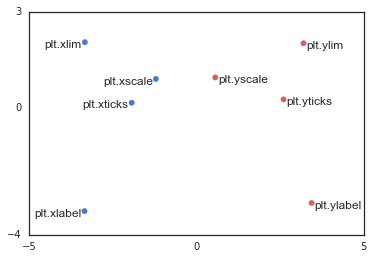

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline
colors = map(lambda x:'#4878CF' if x[4] == 'x' else '#D65F5F', r_words)
plt.scatter(r2[:,0],r2[:,1], s=30, color=colors)
plt.xlim(-5,5)
for i, w in enumerate(r_words):
    plt.annotate(
        w.decode('utf-8', 'ignore'),
        xy = (r2[i,0], r2[i,1]), 
        xytext = (-3 if w[4]=='x' else 3, 3),
        textcoords = 'offset points', 
        ha = 'left' if w[4] == 'y' else 'right',
        va = 'top',
        fontsize=12)
plt.xticks([-5,0,5])
plt.yticks([-4,0,3])

from matplotlib.backends.backend_pdf import PdfPages
from codemend import relative_path
pp = PdfPages(relative_path('models/output/fig-analogy.pdf'))
plt.savefig(pp, format='pdf')
pp.close()